Деревья решений CART.
===============

Используемые дополнительно ссылки.

https://scikit-learn.org/stable/modules/model_evaluation.html<br>
https://habr.com/ru/post/349078/<br>



## Деревья решений для задач классификации

In [2]:
#  Подключаю необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
#  Импортирую данные
df = pd.read_csv('winequality-red.csv', sep=';')

In [4]:
#  проверяю как все загрузилось
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Классы не сбалансированы по формулировке задачи (проверка ниже), хабр говорит "В деревьях решений, дисбаланс 
# классов влияет на меры неоднородности (impurity) листьев, но это влияние примерно пропорционально 
# для всех кандидатов в очередную разбивку (split), и потому обычно не особо влияет на выбор разбивок."

# так же формулировка задачи намекает на то, что некоторые атрибуты коррелированы, буду искать, если не удовлетворит качество
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
#  Проверяю размерность матрицы данных
df.shape

(1599, 12)

In [7]:
#  разделяю предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 11].values  

In [8]:
#  разделяю на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)  


In [9]:
#  Задаю параметры модели
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
# пока что оставляю как было в лекции
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               # максимальное число конечных узлов (сейчас - без ограничений)
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=8,
                               # минимальное число элементов в листе (может быть долей)
                               # min_samples_leaf=5,
                               # минимальное значение уменьшения загрязнения (impurity)
                               min_impurity_decrease=0.001,
                               # веса классов (можно дополнительно штрафовать за ошибку 
                               # в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # Используем, если задаем веса классов
                               min_weight_fraction_leaf=0,
                               # Рекомендация: не менять.
                               # предварительная сортировка.
                               # ускоряет обучение на данных малого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False,                               
                               # Рекомендация: не менять.
                               # какое расщепление выбирать? ('best' или 'random')
                               splitter='best',
                               # Рекомендация: не менять. Важно в RandomForest и так далее
                               # Перебирать все переменные
                               max_features = None)

# Обучаем модель
model.fit(X_train, y_train)

/Users/krnvln/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.001,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0, presort=False,
                       random_state=42)

In [10]:
#смотрю что и как влияло на дерево
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)


,feature,importance
10,alcohol,0.390777
9,sulphates,0.183171
6,total sulfur dioxide,0.132666
1,volatile acidity,0.073865
7,density,0.046195
5,free sulfur dioxide,0.043676
0,fixed acidity,0.036950
3,residual sugar,0.032888
8,pH,0.029675
4,chlorides,0.025355


In [11]:
# Строим предсказание модели
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [12]:
from sklearn import metrics

In [13]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,3,4,5,6,7,8
3,0,0,1,1,0,0
4,0,0,4,3,3,0
5,0,4,137,65,6,0
6,0,3,45,107,44,0
7,0,0,1,17,35,0
8,0,0,0,3,1,0


In [14]:
conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,3,4,5,6,7,8
3,0,1,6,1,0,0
4,0,7,16,20,0,0
5,0,2,327,117,23,0
6,0,6,79,321,33,0
7,0,2,3,35,106,0
8,0,0,0,6,8,0


In [15]:
from sklearn.metrics import balanced_accuracy_score
print("Accuracy on train set is ",  balanced_accuracy_score(y_train, y_pred_train)*100)
print("Accuracy on test set is ", balanced_accuracy_score(y_test, y_pred_test)*100)

Accuracy on train set is  38.62089215363135
Accuracy on test set is  30.73820359659935


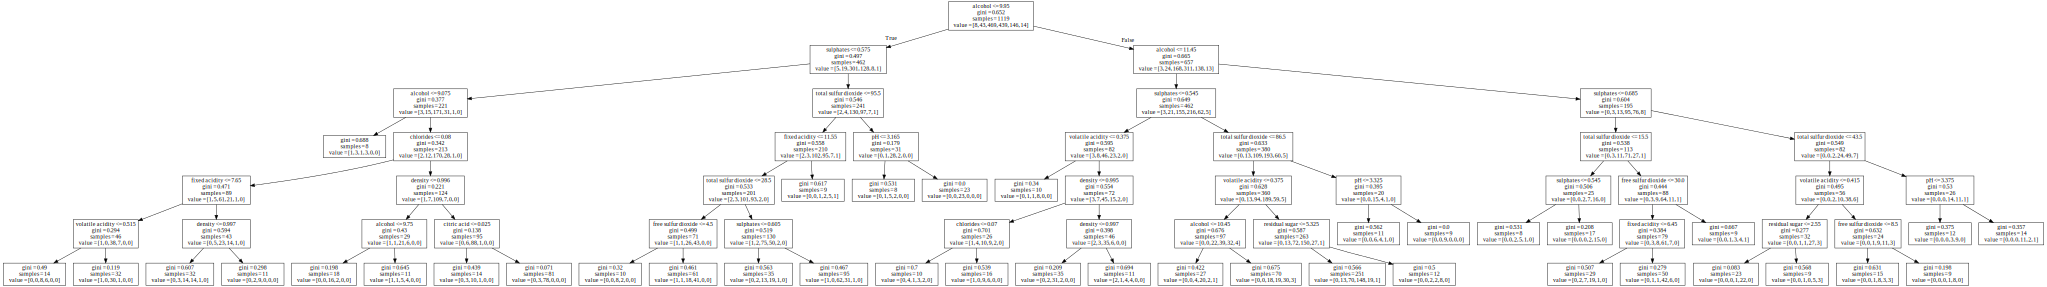

In [16]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(model, out_file=None, feature_names=df.iloc[:, :-1].columns))

## Оценка качества классификатора

In [17]:
#  from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,3,4,5,6,7,8
3,0,0,1,1,0,0
4,0,0,4,3,3,0
5,0,4,137,65,6,0
6,0,3,45,107,44,0
7,0,0,1,17,35,0
8,0,0,0,3,1,0


In [18]:
# больше всего интересуют precision и recall
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.73      0.65      0.69       212
           6       0.55      0.54      0.54       199
           7       0.39      0.66      0.49        53
           8       0.00      0.00      0.00         4

    accuracy                           0.58       480
   macro avg       0.28      0.31      0.29       480
weighted avg       0.59      0.58      0.58       480



/Users/krnvln/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Активируем поиск на решетке GridSearchCV
from sklearn.model_selection import GridSearchCV

In [20]:
# Инициализируем модель
model_2 = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=8,
                               min_impurity_decrease=0.001,
                               class_weight=None,
                               min_weight_fraction_leaf=0,
                               presort=False,                               
                               splitter='best',
                               max_features = None)

In [21]:
#   Определяем тестируемые значения гиперпараметров
#мощности компьютера хватает для таких больших массивов
# время работы примерно 2 минуты
params_set = {
'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13, 14, 15, 16, 17, 18, 19, 20],
'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13, 14, 15, 16, 17, 18, 19, 20],
'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13, 14, 15, 16, 17, 18, 19, 20]
}


#   Проводим 5-fold кросс-валидацию
#   Качество моделей сравниваем с помощью roc_auc_ovo_weighted, так как классы не сбалансрованы
grid_CV_1 = GridSearchCV(estimator=model_2,
       param_grid=params_set,
       scoring='roc_auc_ovo_weighted',
       cv=5,
       n_jobs=-1)


#   Обучение на обучающей выборке
grid_CV_1.fit(X_train, y_train)

/Users/krnvln/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6,
                                              min_impurity_decrease=0.001,
                                              min_samples_leaf=8,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0,
                                              presort=False, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                   

In [22]:
#   Лучший набор значений гиперпараметров

best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [23]:
# Значение критерия качества для лучших значений гиперпараметров 
best_CV_score = grid_CV_1.best_score_
print('Лучшее roc_auc_ovo_weighted', best_CV_score)

Лучшее roc_auc_ovo_weighted 0.7065472525508774


In [24]:
# Лучшая модель
best_model = grid_CV_1.best_estimator_

# accuracy на тестовом множестве для лучшей модели
test_acc = best_model.score(X_test,y_test)

# начение критерия качества для лучших значений гиперпараметров 
print('Лучшее roc_auc_ovo_weighted на тестовом множестве', test_acc)

Лучшее roc_auc_ovo_weighted на тестовом множестве 0.59375


In [25]:
# Качество удолетворяет, поэтому еще раз инициализируем модель
# в этот раз ставлю параметры по подбору
upd_model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=4,
                               # максимальное число конечных узлов (сейчас - без ограничений)
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=2,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=10,
                               # минимальное число элементов в листе (может быть долей)
                               # min_samples_leaf=5,
                               # минимальное значение уменьшения загрязнения (impurity)
                               min_impurity_decrease=0.001,
                               # веса классов (можно дополнительно штрафовать за ошибку 
                               # в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # Используем, если задаем веса классов
                               min_weight_fraction_leaf=0,
                               # Рекомендация: не менять.
                               # предварительная сортировка.
                               # ускоряет обучение на данных малого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False,                               
                               # Рекомендация: не менять.
                               # какое расщепление выбирать? ('best' или 'random')
                               splitter='best',
                               # Рекомендация: не менять. Важно в RandomForest и так далее
                               # Перебирать все переменные
                               max_features = None)

# Обучаем модель
upd_model.fit(X_train, y_train)

/Users/krnvln/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.001,
                       min_samples_leaf=10, min_weight_fraction_leaf=0,
                       presort=False, random_state=42)

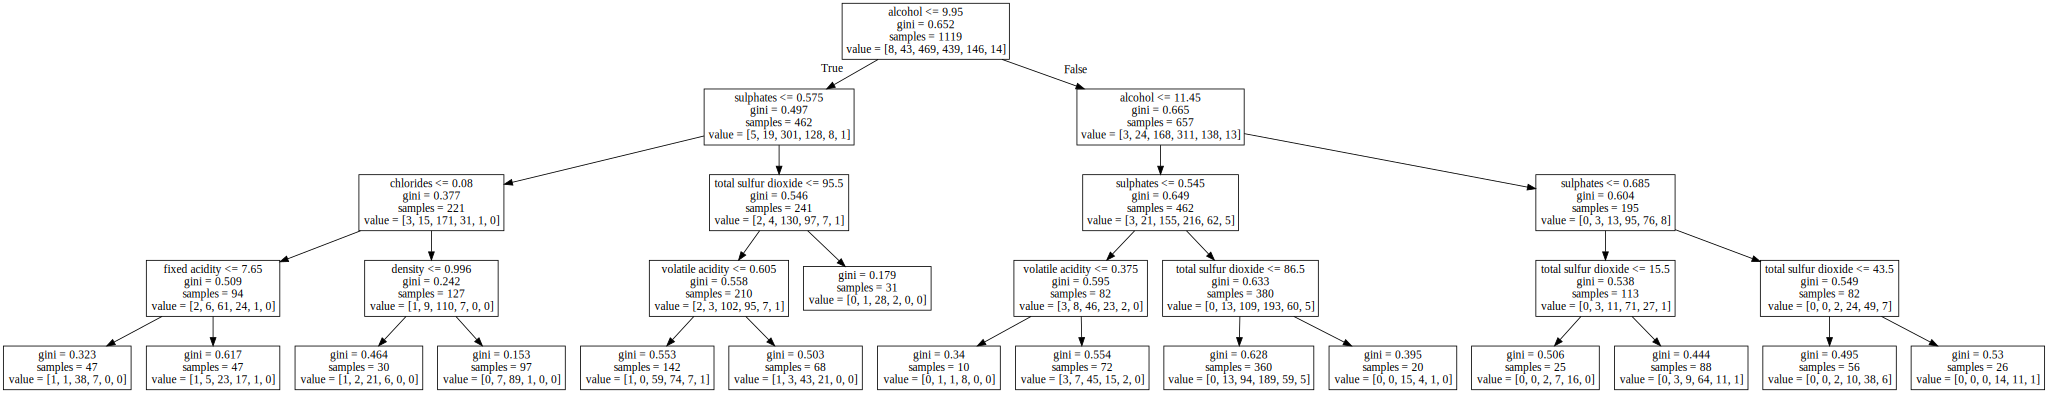

In [26]:
#смотрим на новое дерево
Source( tree.export_graphviz(upd_model, out_file=None, feature_names=df.iloc[:, :-1].columns))

In [27]:
# больше всего интересуют precision и recall
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.73      0.65      0.69       212
           6       0.55      0.54      0.54       199
           7       0.39      0.66      0.49        53
           8       0.00      0.00      0.00         4

    accuracy                           0.58       480
   macro avg       0.28      0.31      0.29       480
weighted avg       0.59      0.58      0.58       480



/Users/krnvln/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
